In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ingesting the datasets 
df=pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

print('A sample set of rows for dataframe is:\n')
display(df.sample(6))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


A sample set of rows for dataframe is:



,N,P,K,temperature,humidity,ph,rainfall,label
940,39,30,38,20.126449,87.596296,6.965157,108.065579,pomegranate
547,10,44,24,30.992569,43.021514,8.034413,58.276007,mothbeans
593,18,36,23,24.018254,53.766234,7.214079,35.034044,mothbeans
1235,32,129,201,16.362519,83.004716,6.487546,71.556655,grapes
29,84,51,35,22.301574,80.644165,6.043305,197.979121,rice
1326,91,21,50,24.335282,81.440304,6.762030,48.321136,watermelon


In [2]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


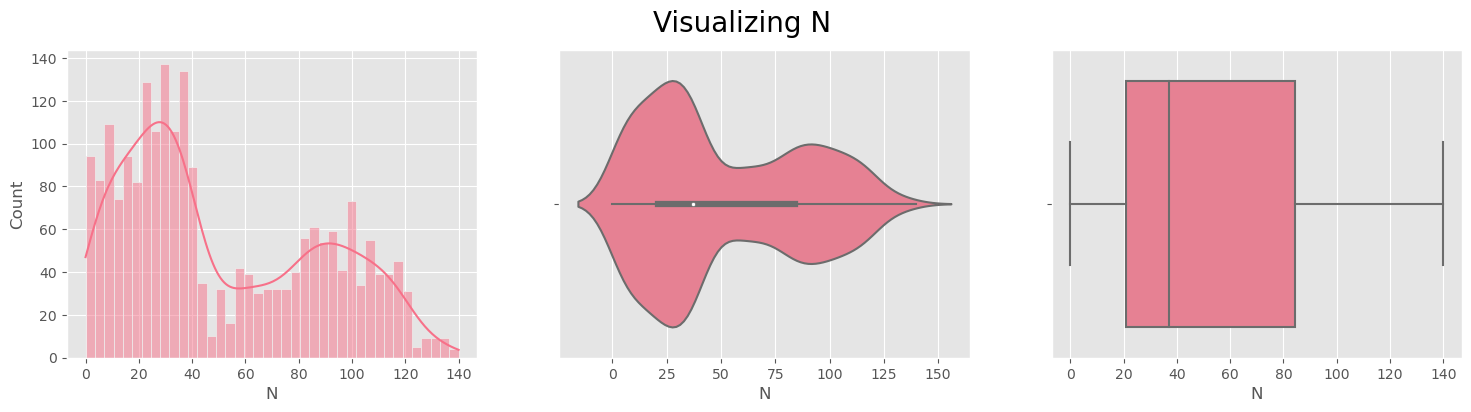

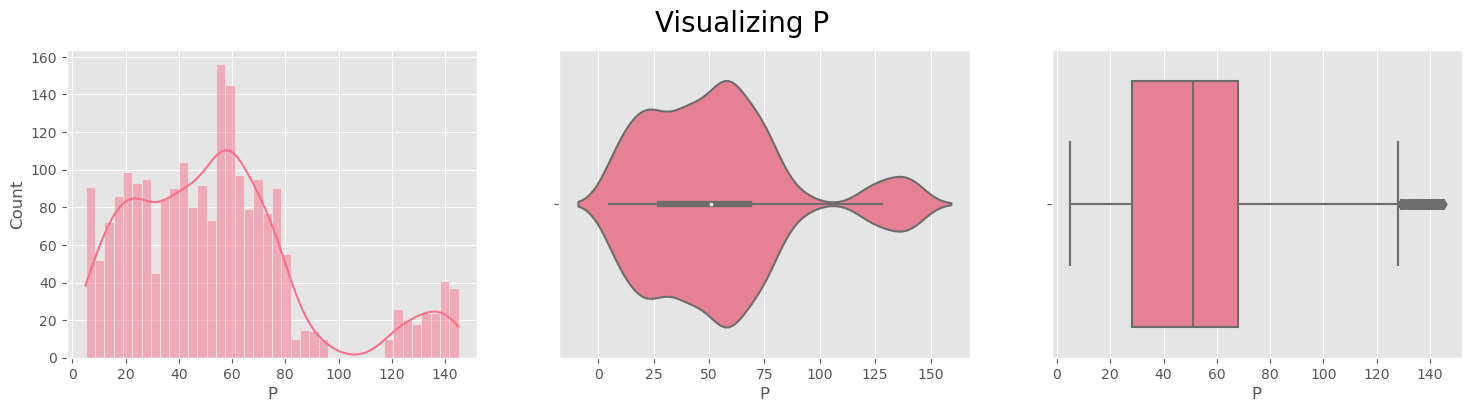

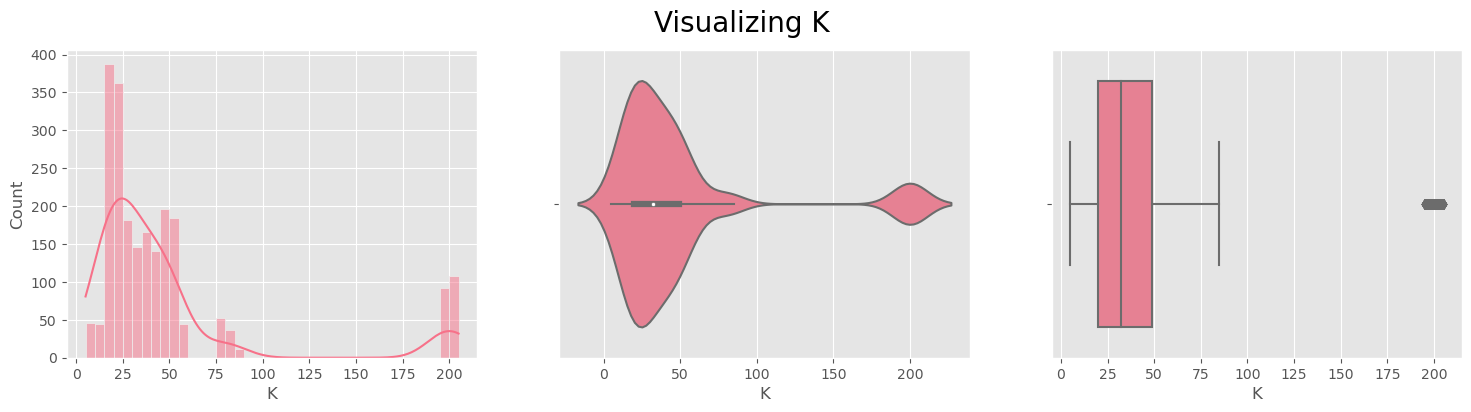

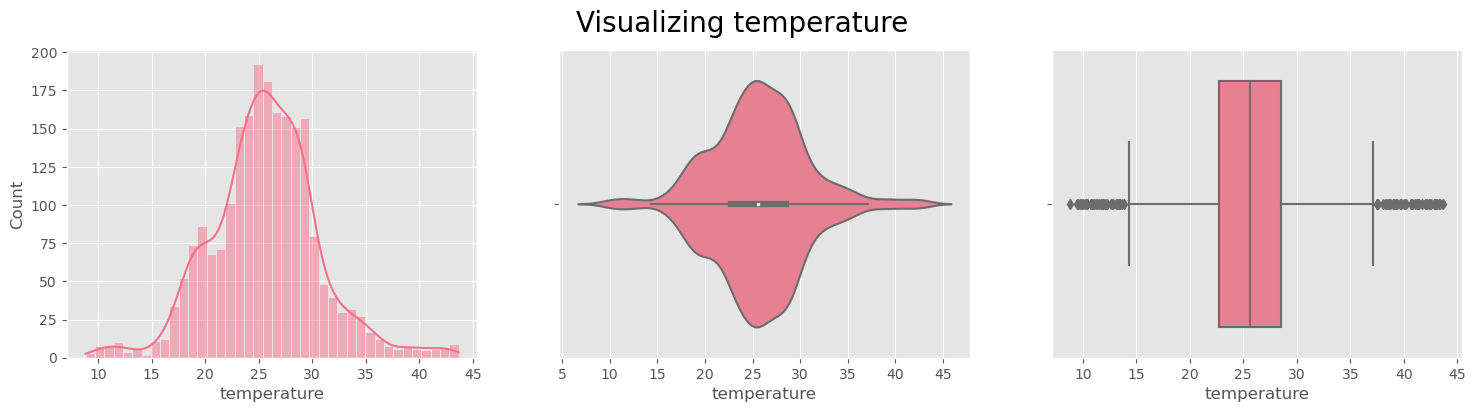

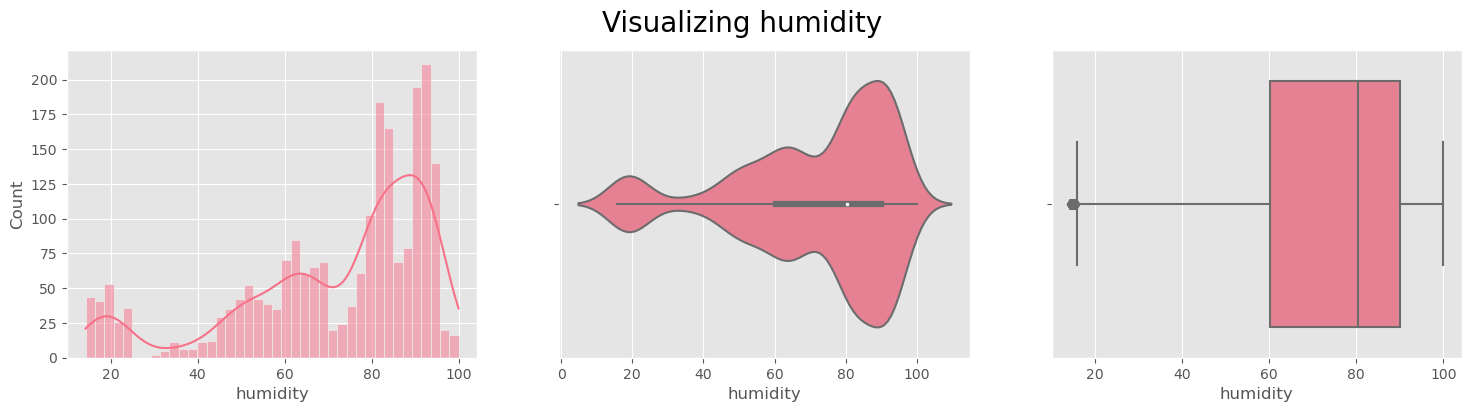

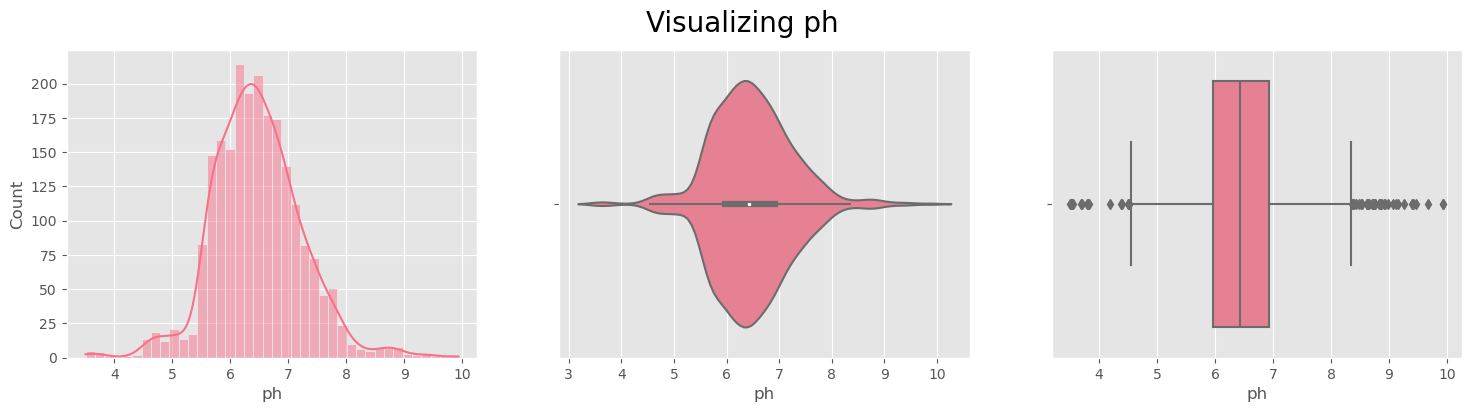

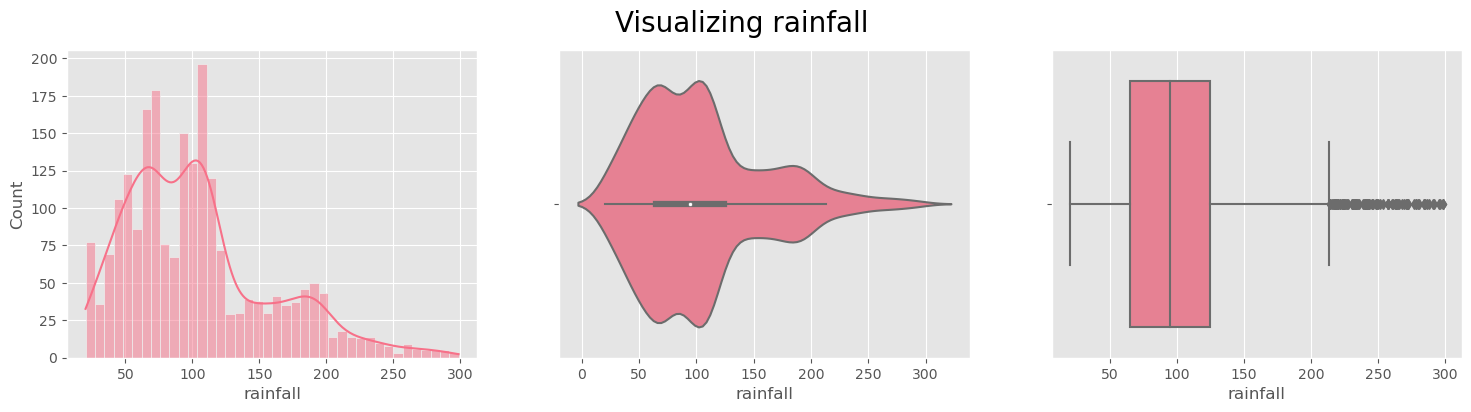

In [5]:
plt.style.use('ggplot')
sns.set_palette("husl")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=40,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

In [6]:
grouped = df.groupby(by='label').mean().reset_index()
grouped

,label,N,P,K,temperature,humidity,ph,rainfall
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


In [7]:
print(f'********************************')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'********************************')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'********************************')

********************************
Top 5 Most N requiring crops:
********************************
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
********************************
Top 5 Most P requiring crops:
********************************
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
********************************
Top 5 Most K requiring crops:
********************************
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
********************************
Top 5 Most temperature requiring crops:
********************************
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
********************************
Top 5 Most humidity requiring crops:
********************************
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34280196089999
apple -

In [8]:
print(f'********************************')
for i in grouped.columns[1:]:
    print(f'Top 5 Least {i} requiring crops:')
    print(f'********************************')
    for j ,k in grouped.sort_values(by=i)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'********************************')

********************************
Top 5 Least N requiring crops:
********************************
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
********************************
Top 5 Least P requiring crops:
********************************
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
********************************
Top 5 Least K requiring crops:
********************************
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
********************************
Top 5 Least temperature requiring crops:
********************************
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
********************************
Top 5 Least humidity requiring crops:
********************************
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pigeonpeas --> 48.061633

/tmp/ipykernel_20/1703326848.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

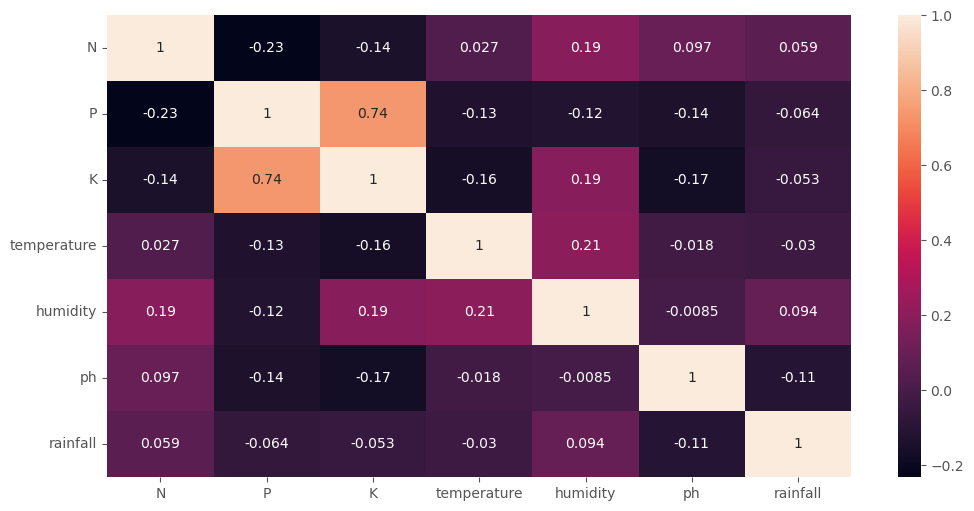

In [9]:
figure = plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),annot=True)

In [10]:
from sklearn.decomposition import PCA
import plotly.express as px

pca=PCA(n_components=2)
df_pca=pca.fit_transform(df.drop(['label'],axis=1))
df_pca=pd.DataFrame(df_pca)
fig = px.scatter(x=df_pca[0],y=df_pca[1],color=df['label'],title="Decomposed using PCA")
fig.show()

In [11]:
fig = px.scatter(x=df['N'],y=df['P'],color=df['label'],title="Nitrogen VS Phosphorus")
fig.show()

In [12]:
fig = px.scatter(x=df['P'],y=df['K'],color=df['label'],title="Phosphorus VS Potassium")
fig.show()

In [13]:
# #would be required in future to get the names of crops back from encoded form
# names = df['label'].unique()
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# df['label']=encoder.fit_transform(df['label'])
# df.sample(5)

In [14]:
X=df.drop(['label'],axis=1)
y=df['label']
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                shuffle = True, random_state = 42,stratify=y)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=scaler.transform(X_test)
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
0,-1.335936,0.417499,-0.535091,0.378274,-0.489416,0.105457,-1.006138
1,1.797538,0.874355,-0.061709,-0.056432,0.352421,-1.102431,0.037615
2,-1.308923,0.234757,-0.554816,-0.672000,-2.173304,-0.662710,-0.486121
3,-0.282441,0.752527,-0.554816,-1.248506,-2.271540,-1.031842,-0.422218
4,-1.173860,-1.013983,-0.712610,-1.765899,1.047107,0.007107,0.121738


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.9924242424242424

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

model_names = ['svm', 'random_forest', 'logistic_regression', 'gradient_boosting', 'gaussian_nb']

# Initialize classifiers
svm = SVC()
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression(solver='liblinear', multi_class='auto')
gradient_boosting = GradientBoostingClassifier()
gaussian_nb = GaussianNB()

# List of classifiers
models = [svm, random_forest, logistic_regression, gradient_boosting, gaussian_nb]

# Hyperparameter search spaces for each classifier
model_params = [
    {'C': [1, 10, 100, 0.1], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto']},
    {'n_estimators': [1, 5, 10]},
    {'C': [1, 5, 10], 'penalty': ['l1', 'l2', 'elasticnet']},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
    {'var_smoothing': [0.4, 0.8, 1e-9]}
]

In [18]:
# Perform grid search for each classifier
for name, model, params in zip(model_names, models, model_params):
    grid_search = GridSearchCV(model, params, cv=5)
    grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your data
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters for {name}: {best_params}")
    print(f"Best cross-validation score for {name}: {best_score}")

Best parameters for svm: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score for svm: 0.9857142857142858
Best parameters for random_forest: {'n_estimators': 10}
Best cross-validation score for random_forest: 0.9902597402597403
Best parameters for logistic_regression: {'C': 5, 'penalty': 'l1'}
Best cross-validation score for logistic_regression: 0.9642857142857142
Best parameters for gradient_boosting: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation score for gradient_boosting: 0.981818181818182
Best parameters for gaussian_nb: {'var_smoothing': 1e-09}
Best cross-validation score for gaussian_nb: 0.9948051948051948


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

best_model=GaussianNB(var_smoothing=1e-9)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
score=accuracy_score(y_pred,y_test)
print('The accuracy score of the Model is {}\n\n'.format(score))
report=classification_report(y_pred,y_test)
print('The classification Report is')
display(report)

The accuracy score of the Model is 0.9924242424242424


The classification Report is


'              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        30\n      banana       1.00      1.00      1.00        30\n   blackgram       1.00      1.00      1.00        30\n    chickpea       1.00      1.00      1.00        30\n     coconut       1.00      1.00      1.00        30\n      coffee       1.00      1.00      1.00        30\n      cotton       1.00      0.97      0.98        31\n      grapes       1.00      1.00      1.00        30\n        jute       1.00      0.91      0.95        33\n kidneybeans       1.00      1.00      1.00        30\n      lentil       0.97      1.00      0.98        29\n       maize       0.97      1.00      0.98        29\n       mango       1.00      1.00      1.00        30\n   mothbeans       1.00      0.97      0.98        31\n    mungbean       1.00      1.00      1.00        30\n   muskmelon       1.00      1.00      1.00        30\n      orange       1.00      1.00      1.00        30\n      p

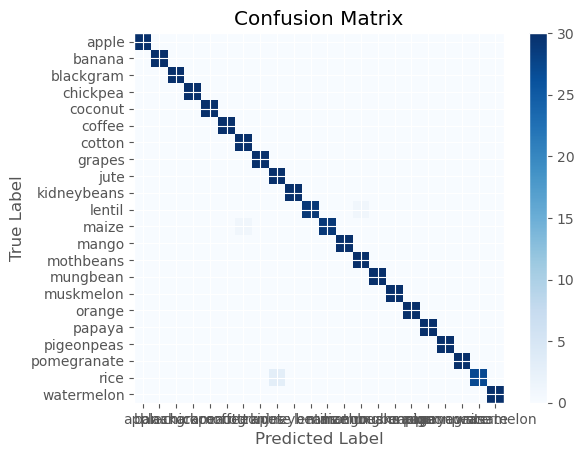

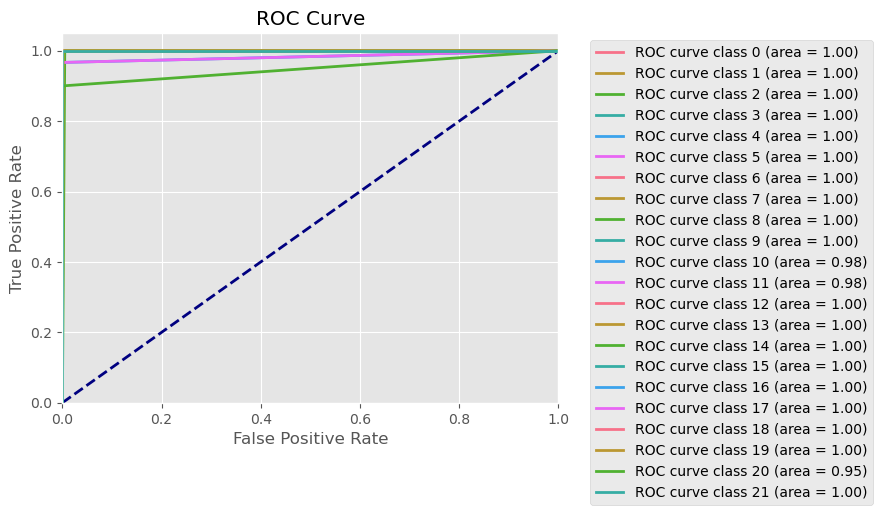

In [20]:
import numpy as np
from sklearn.preprocessing import label_binarize

n_classes=len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(n_classes), np.unique(y_test))
plt.yticks(np.arange(n_classes), np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Generate ROC curve and calculate AUC for multiclass classification
if n_classes > 2:
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class %d (area = %0.2f)' % (i, roc_auc[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    # Position the legend outside the plot and adjust its position
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()